In [16]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import numpy as np
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

2.4.1


In [17]:
# A plotting function you can reuse
def plot(history):
  
  # The history object contains results on the training and test
  # sets for each epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get the number of epochs
  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

In [18]:
class CustomCallback_epoch(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        print('SAVING INITIAL WEIGHT VALUES')
        weight_history.append(self.model.get_weights())

    def on_epoch_end(self, epoch, logs=None):
        # list of weight tensors
        curr_weight = self.model.get_weights()
        if weight_history:
          weight_change = [curr_weight[i] - weight_history[0][i] for i in range(len(curr_weight))]
          norm_delta = [tf.norm(t, ord=2).numpy() for t in weight_change]
          print('L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES: ', norm_delta)
          weight_history.append(norm_delta) 
        else:
          print('EPOCH', epoch)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 2355      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                40        
Total params: 2,395
Trainable params: 2,395
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3020 - accuracy: 0.1123 - val_loss: 2.3011 - val_accuracy: 0.1135
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [0.0, 0.0, 0.0, 0.1447299]
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3012 - accuracy: 0.1113 - val_loss: 2.3011

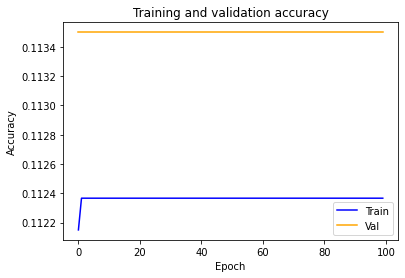

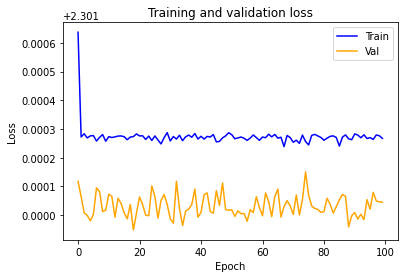

In [19]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_active = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(3, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax', kernel_initializer = initializer)
])

weight_history = []

print(model_active.summary())

model_active.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_active.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_active.predict(x_test), axis=1)))

active_weight_history = weight_history[1:]

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 2355      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                40        
Total params: 2,395
Trainable params: 2,395
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3019 - accuracy: 0.1116 - val_loss: 2.3011 - val_accuracy: 0.1135
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [8.703997e-11, 2.3028094e-12, 8.708912e-11, 0.14733261]
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3013 - accura

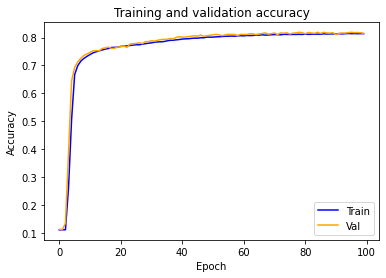

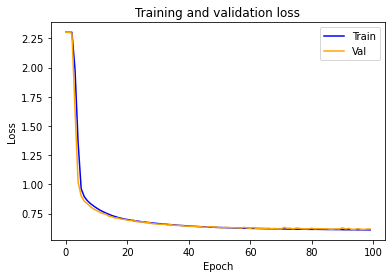

In [20]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=(1/100480000000000), seed=20000)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_active = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(3, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax', kernel_initializer = initializer)
])

weight_history = []

print(model_active.summary())

model_active.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_active.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_active.predict(x_test), axis=1)))

active_weight_history = weight_history[1:]

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 3)                 2355      
_________________________________________________________________
dense_29 (Dense)             (None, 10)                40        
Total params: 2,395
Trainable params: 2,395
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2692 - accuracy: 0.1324 - val_loss: 1.6902 - val_accuracy: 0.3081
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [1.7166328, 0.11710591, 1.729153, 0.4890397]
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5106 - accuracy: 0.4070 

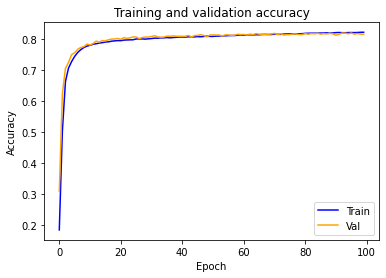

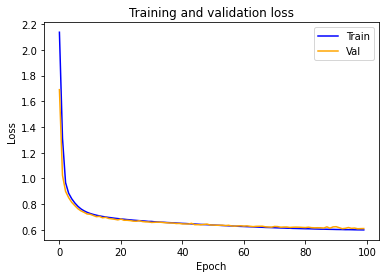

In [21]:
# this initializer uses 1/num_parameters as variance, should trigger active training
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=(1/100480)**0.5, seed=20000)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_active = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(3, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax', kernel_initializer = initializer)
])

weight_history = []

print(model_active.summary())

model_active.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_active.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_active.predict(x_test), axis=1)))

active_weight_history = weight_history[1:]

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 3)                 2355      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                40        
Total params: 2,395
Trainable params: 2,395
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3009 - accuracy: 0.1147 - val_loss: 2.1298 - val_accuracy: 0.2826
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [0.65876955, 0.020285793, 0.6594105, 0.21038124]
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8505 - accuracy: 0.2

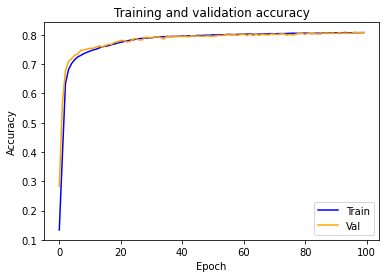

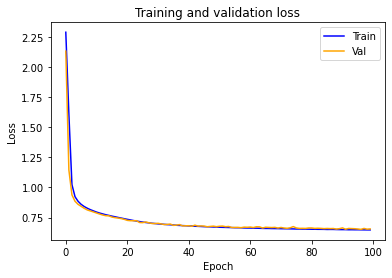

In [22]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.0001, seed=20000)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_active = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(3, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax', kernel_initializer = initializer)
])

weight_history = []

print(model_active.summary())

model_active.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_active.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])

plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_active.predict(x_test), axis=1)))

active_weight_history = weight_history[1:]

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 2355      
_________________________________________________________________
dense_33 (Dense)             (None, 10)                40        
Total params: 2,395
Trainable params: 2,395
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2581 - accuracy: 0.1418 - val_loss: 1.6524 - val_accuracy: 0.3172
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [1.8338879, 0.1324809, 1.8504568, 0.5180475]
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4769 - accuracy: 0.4250 

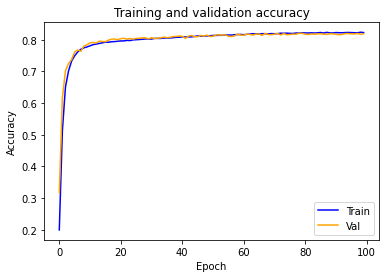

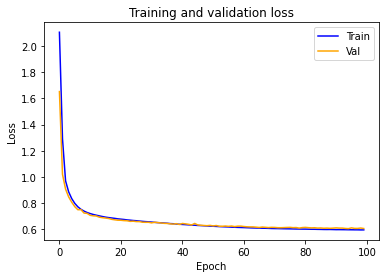

In [23]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.005, seed=20000)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_active = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(3, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax', kernel_initializer = initializer)
])

weight_history = []

print(model_active.summary())

model_active.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_active.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])

plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_active.predict(x_test), axis=1)))

active_weight_history = weight_history[1:]

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 3)                 2355      
_________________________________________________________________
dense_35 (Dense)             (None, 10)                40        
Total params: 2,395
Trainable params: 2,395
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1213 - accuracy: 0.2001 - val_loss: 1.4915 - val_accuracy: 0.4529
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [2.3085365, 0.25350153, 2.3078866, 0.9495357]
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3444 - accuracy: 0.5035

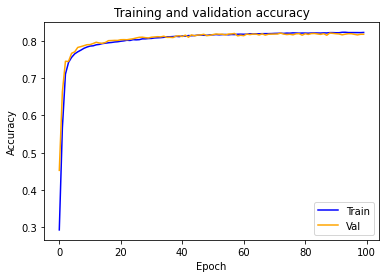

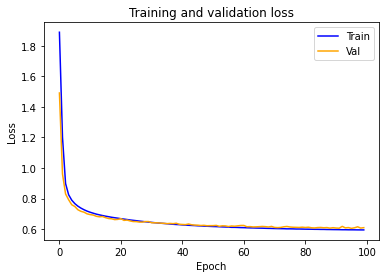

In [24]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.1, seed=20000)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_active = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(3, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax', kernel_initializer = initializer)
])

weight_history = []

print(model_active.summary())

model_active.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_active.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])

plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_active.predict(x_test), axis=1)))

active_weight_history = weight_history[1:]

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 3)                 2355      
_________________________________________________________________
dense_37 (Dense)             (None, 10)                40        
Total params: 2,395
Trainable params: 2,395
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 3.3936 - accuracy: 0.1179 - val_loss: 2.3166 - val_accuracy: 0.1175
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [4.9713516, 0.8346898, 2.239247, 0.21019208]
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3225 - accuracy: 0.1169 

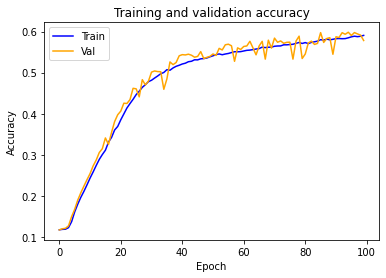

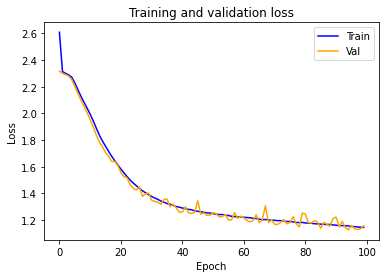

In [25]:
# this initializer uses sqrt(2) as stddev, much higher than default, should trigger lazy training
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.414, seed=20000)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_lazy = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(3, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax', kernel_initializer = initializer)
])

weight_history = []

print(model_lazy.summary())

model_lazy.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_lazy.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])

plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_lazy.predict(x_test), axis=1)))

lazy_weight_history = weight_history[1:]

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 3)                 2355      
_________________________________________________________________
dense_39 (Dense)             (None, 10)                40        
Total params: 2,395
Trainable params: 2,395
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 4.6378 - accuracy: 0.1157 - val_loss: 2.3582 - val_accuracy: 0.1137
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [7.3143053, 1.2637821, 3.0914662, 0.19423415]
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3561 - accuracy: 0.1147

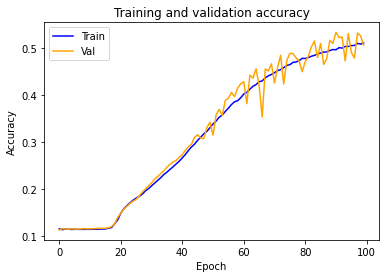

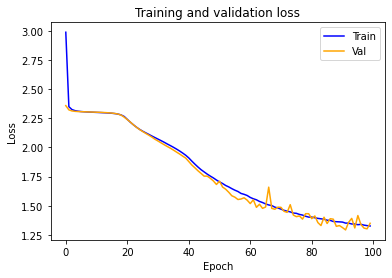

In [26]:
# this initializer uses sqrt(2) as stddev, much higher than default, should trigger lazy training
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=2, seed=20000)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_lazy = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(3, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax', kernel_initializer = initializer)
])

weight_history = []

print(model_lazy.summary())

model_lazy.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_lazy.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])

plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_lazy.predict(x_test), axis=1)))

lazy_weight_history = weight_history[1:]

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 3)                 2355      
_________________________________________________________________
dense_41 (Dense)             (None, 10)                40        
Total params: 2,395
Trainable params: 2,395
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 17.7117 - accuracy: 0.1155 - val_loss: 2.7298 - val_accuracy: 0.1102
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [18.998426, 3.345892, 7.449946, 0.20744076]
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.7422 - accuracy: 0.1115 

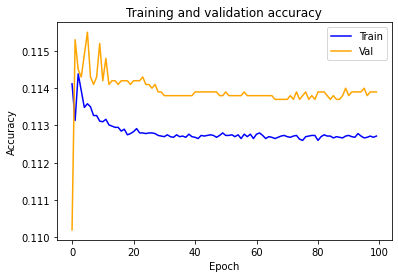

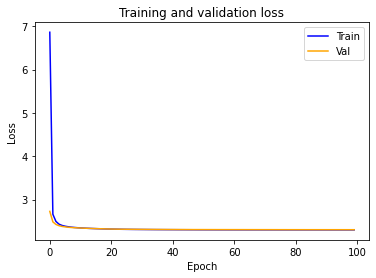

In [27]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=5, seed=20000)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_lazy = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(3, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax', kernel_initializer = initializer)
])

weight_history = []

print(model_lazy.summary())

model_lazy.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_lazy.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])

plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_lazy.predict(x_test), axis=1)))

lazy_weight_history = weight_history[1:]

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 3)                 2355      
_________________________________________________________________
dense_43 (Dense)             (None, 10)                40        
Total params: 2,395
Trainable params: 2,395
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 46275.7299 - accuracy: 0.1153 - val_loss: 2421.3191 - val_accuracy: 0.1242
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [996.31915, 176.74173, 464.6146, 0.30281046]
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 1719.1833 - accurac

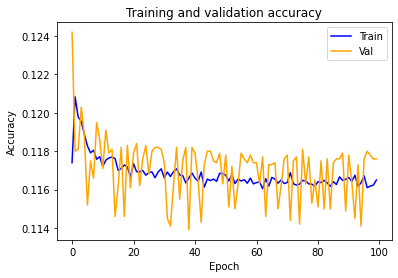

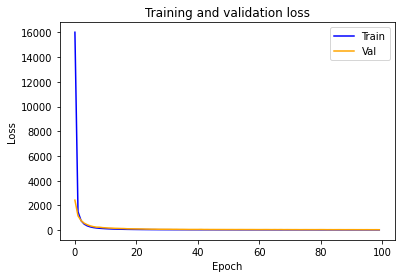

In [28]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=(100480)**0.5)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_active = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(3, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax', kernel_initializer = initializer)
])

weight_history = []

print(model_active.summary())

model_active.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_active.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_active.predict(x_test), axis=1)))

active_weight_history = weight_history[1:]

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 3)                 2355      
_________________________________________________________________
dense_45 (Dense)             (None, 10)                40        
Total params: 2,395
Trainable params: 2,395
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9739 - accuracy: 0.2760 - val_loss: 1.2106 - val_accuracy: 0.6284
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [2.7098663, 0.27490482, 2.1465268, 1.3808728]
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1434 - accuracy: 0.6445

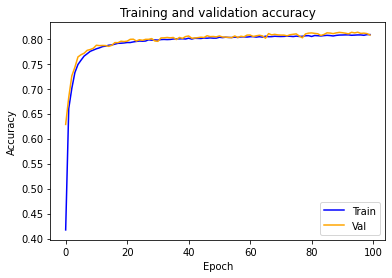

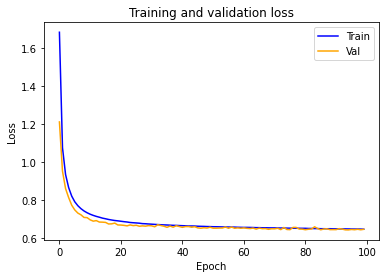

In [29]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.005, seed=20000)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_lazy = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(3, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax')
])

weight_history = []

print(model_lazy.summary())

model_lazy.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_lazy.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])

plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_lazy.predict(x_test), axis=1)))

lazy_weight_history = weight_history[1:]

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 3)                 2355      
_________________________________________________________________
dense_47 (Dense)             (None, 10)                40        
Total params: 2,395
Trainable params: 2,395
Non-trainable params: 0
_________________________________________________________________
None
SAVING INITIAL WEIGHT VALUES
Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.8536 - accuracy: 0.1681 - val_loss: 2.4660 - val_accuracy: 0.1782
L2 NORM OF WEIGHT CHANGE RELATIVE TO INITIAL VALUES:  [1.1733763, 0.1879083, 1.9605793, 0.75870496]
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3138 - accuracy: 0.1791

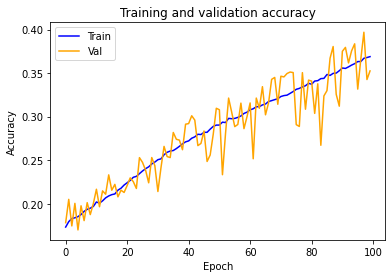

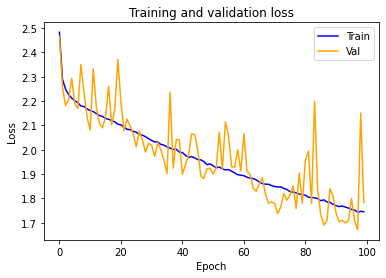

In [30]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=5, seed=20000)
# default initializer is glorot initialization: truncated normal distribution centered on 0 with 
# stddev = sqrt(2 / (fan_in + fan_out)), variance is 2 / (fan_in + fan_out) = 0.00252
# fan-in=784 fan-out=10 for single hidden layer (stddet = 0.05, var=0.00252)
model_lazy = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(3, activation='relu', kernel_initializer = initializer),
  tf.keras.layers.Dense(10, activation='softmax')
])

weight_history = []

print(model_lazy.summary())

model_lazy.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_lazy.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[CustomCallback_epoch()])

plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model_lazy.predict(x_test), axis=1)))

lazy_weight_history = weight_history[1:]